# Impoart

In [36]:
import import_ipynb
import MaskRCNN_VOC as mrv

import tqdm
import torch
import torchvision

import numpy as np
import bbox_visualizer as bbv
import matplotlib.pyplot as plt


from MaskRCNN_VOC import VOC2012_MaskRCNN_InstanceSegmentation as Task
from MaskRCNN_VOC import VOC2012_MaskRCNN_InstanceSegmentation_Dataset as TaskDataset
from MaskRCNN_VOC import VOC2012_MaskRCNN_InstanceSegmentation_DataLoader as TaskDataloader


# Device

In [37]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

# Dataset (Pascal VOC 2012)

In [38]:
train_dataset = TaskDataset(root = "/home/VOCdevkit/VOC2012", image_set = "train")
train_data_loader = TaskDataloader(train_dataset, batch_size = 10)

val_dataset = TaskDataset(root = "/home/VOCdevkit/VOC2012", image_set = "val")
val_data_loader = TaskDataloader(train_dataset, batch_size = 10)

# Model

In [48]:
# model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model = torchvision.models.detection.maskrcnn_resnet50_fpn_v2(pretrained=True)
model.roi_heads.box_predictor.cls_score = torch.nn.Linear(in_features=1024, out_features=21, bias=True)
model.roi_heads.box_predictor.bbox_pred = torch.nn.Linear(in_features=1024, out_features=84, bias=True)
model.roi_heads.mask_predictor.mask_fcn_logits = torch.nn.Conv2d(256, 21, kernel_size=(1, 1), stride=(1, 1))
model.to(device)
# model.load_state_dict(torch.load("models/trained_model"))
model.load_state_dict(torch.load("models/trained_model(500-epoch)"))

/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_V2_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

In [46]:
# model.train()
# images, targets = next(iter(train_data_loader))
# images, targets = Task.batch_to(images, targets, device)
# results = model(images, targets)
# results["loss_mask"]



{'loss_classifier': tensor(3.4069, device='cuda:0', grad_fn=<NllLossBackward0>),
 'loss_box_reg': tensor(0.3342, device='cuda:0', grad_fn=<DivBackward0>),
 'loss_mask': tensor(0.7458, device='cuda:0',
        grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 'loss_objectness': tensor(0.0140, device='cuda:0',
        grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 'loss_rpn_box_reg': tensor(0.0092, device='cuda:0', grad_fn=<DivBackward0>)}

# Train

In [5]:
CLASS_NUM = Task.CLASS_NUM
MASK_THRESHOLD = 0.5
SCORE_THRESHOLDS = Task.SCORE_THRESHOLDS

epoch = 500

params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.00005, momentum=0.9, weight_decay=0.0005)

train_loss_list = []
val_loss_list = []
for e in range(epoch):
    train_loss = mrv.train_one_epoch(model, optimizer, train_data_loader, device, epoch, print_freq = 10)
    val_loss = Task.loss_eval(model, device, val_data_loader)
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)
    
    print(f"epoch({e+1}) train_loss: {train_loss} val_loss: {val_loss}")

    # if (e+1)%50 == 0:
    #     torch.save(model.state_dict(), f"models/trained_model({e+1}-epoch)")

In [24]:
loss_list = a
map_list = b

In [15]:
torch.save(model.state_dict(), "models/trained_model")

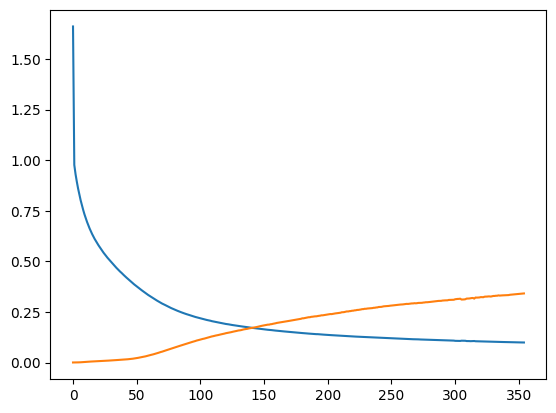

In [34]:
plt.plot(loss_list)
plt.plot(map_list)

[1.6605,
 0.9768,
 0.9305,
 0.8933,
 0.8595,
 0.8295,
 0.8018,
 0.777,
 0.754,
 0.7325,
 0.7133,
 0.6953,
 0.6788,
 0.6632,
 0.6488,
 0.6353,
 0.6228,
 0.611,
 0.6004,
 0.5902,
 0.5797,
 0.5703,
 0.5606,
 0.5518,
 0.5428,
 0.5344,
 0.5268,
 0.5186,
 0.5114,
 0.5035,
 0.4963,
 0.4894,
 0.4821,
 0.4756,
 0.4688,
 0.4624,
 0.4558,
 0.4496,
 0.444,
 0.4375,
 0.4316,
 0.4254,
 0.4199,
 0.4143,
 0.4085,
 0.4029,
 0.3971,
 0.3918,
 0.3867,
 0.3817,
 0.3762,
 0.3716,
 0.3665,
 0.3619,
 0.3573,
 0.3526,
 0.3478,
 0.3433,
 0.3389,
 0.3344,
 0.3303,
 0.3262,
 0.3223,
 0.3181,
 0.3142,
 0.3103,
 0.3063,
 0.3026,
 0.299,
 0.2953,
 0.2917,
 0.2889,
 0.2857,
 0.2824,
 0.2791,
 0.2764,
 0.2727,
 0.2698,
 0.267,
 0.2639,
 0.2616,
 0.2588,
 0.2562,
 0.2539,
 0.2513,
 0.2488,
 0.2464,
 0.2442,
 0.2422,
 0.2398,
 0.2376,
 0.2359,
 0.2338,
 0.2316,
 0.2298,
 0.2279,
 0.2258,
 0.2241,
 0.2225,
 0.2205,
 0.2188,
 0.2173,
 0.2156,
 0.2142,
 0.2126,
 0.2109,
 0.2097,
 0.2083,
 0.2069,
 0.205,
 0.2037,
 0.2026,